## <font color=lightgreen> Introdução a Data Mining - Análise Exploratória de Dados

In [1]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para geração de gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset # base de dados iris
import graphviz

# Bibliotecas de machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             classification_report)

# np.random.seed(0) 
SEED = 0 # valor da semente para pseudo aleatoriedade
         # e reprodução dos mesmos resultados

In [2]:
# Carrega a base de dados
iris = load_dataset('iris')

In [3]:
iris.head() # exibe as 5 (cinco) primeiras linhas do dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### <font color=lightgreen> Gráfico de Dispersão (Scatter Plot)

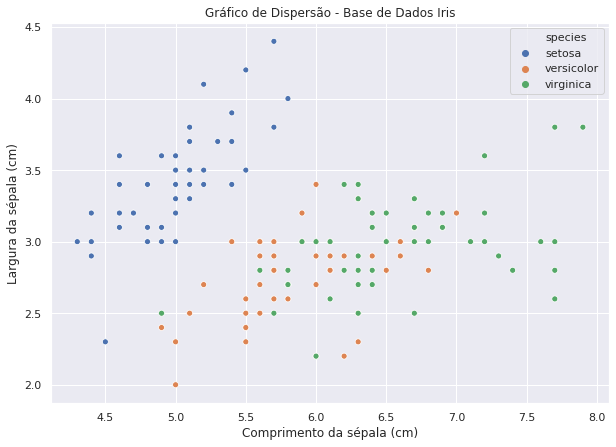

In [4]:
sns.set()

fig, ax = plt.subplots(figsize=(10, 7))

sns.scatterplot(x='sepal_length',  y='sepal_width', data=iris, hue='species')

ax.set(xlabel='Comprimento da sépala (cm)',
       ylabel='Largura da sépala (cm)',
       title='Gráfico de Dispersão - Base de Dados Iris')

plt.show()

### <font color=lightgreen> Gráfico de Barras

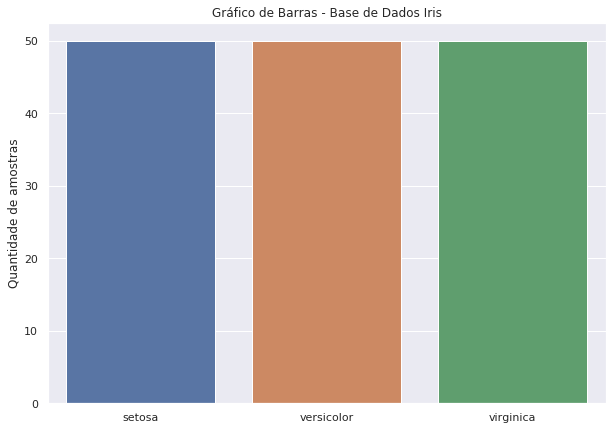

In [5]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.countplot(x='species', data=iris)

ax.set(xlabel=None, 
       ylabel='Quantidade de amostras',
       title='Gráfico de Barras - Base de Dados Iris')

plt.show()

### <font color=lightgreen> Boxplot

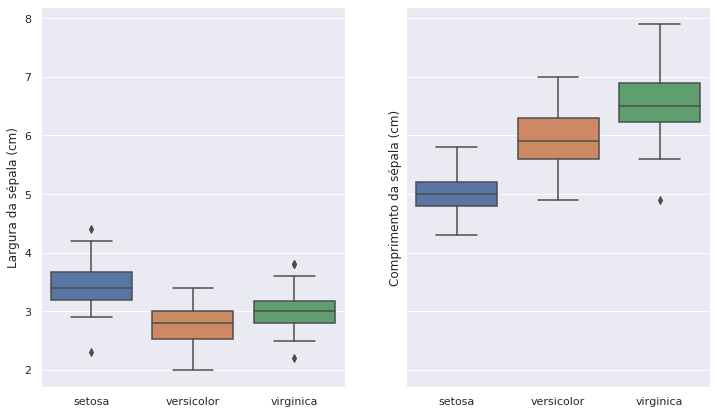

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 7))

sns.boxplot(x='species',  y='sepal_width', data=iris, ax=ax[0])

sns.boxplot(x='species',  y='sepal_length', data=iris, ax=ax[1])

ax[0].set(xlabel=None,
          ylabel='Largura da sépala (cm)')

ax[1].set(xlabel=None,
          ylabel='Comprimento da sépala (cm)')

plt.show()

### <font color=lightgreen> Separando a base de dados entre treino e teste

In [7]:
X = iris.drop('species', axis=1) # seleciona os atributos
                                 # da base de dados

y = iris.species # seleciona a classe da base de dados

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,
    random_state=SEED,
    stratify=y # utilizado para balancear as bases de treino
               # e teste de acordo com a classe
    )

### <font color=lightgreen> Verificação do Balanceamento de Classes

In [8]:
iris['species'].value_counts(dropna=False)

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [9]:
# Percentual
iris['species'].value_counts(normalize=True)

virginica     0.333333
versicolor    0.333333
setosa        0.333333
Name: species, dtype: float64

In [10]:
y_train.value_counts() # valores de classe utilizados para treino

virginica     35
versicolor    35
setosa        35
Name: species, dtype: int64

In [11]:
y_test.value_counts() # valores de classe utilizados para teste

versicolor    15
virginica     15
setosa        15
Name: species, dtype: int64

### <font color=lightgreen> Árvore de Decisão

In [12]:
model = DecisionTreeClassifier(random_state=SEED) # instancia o modelo de 
                                                  # classificação
model.fit(X_train, y_train) # treina o modelo
y_pred = model.predict(X_test) # utiliza o modelo treinado para realizar
                               # previsões sobre uma base desconhecida 

accuracy = accuracy_score(y_test, y_pred) # verifica a acurácia do modelo

print(f'Acurária obtida por meio do modelo árvore de Decisão: {accuracy:.3%}')

Acurária obtida por meio do modelo árvore de Decisão: 97.778%


In [13]:
# Matriz de confusão
pd.crosstab(y_pred,
            y_test,
            rownames=['Previsto'],
            colnames=['Real'],
            margins=True)

Real,setosa,versicolor,virginica,All
Previsto,,,,
setosa,15,0,0,15
versicolor,0,15,1,16
virginica,0,0,14,14
All,15,15,15,45


In [14]:
# Relatório de classificação
print(classification_report(y_test, y_pred))                          

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### <font color=lightgreen> Vizualizando a Árvore de Decisão
Maiores informações em: [scikit_learn: decision tree](https://scikit-learn.org/stable/modules/tree.html)

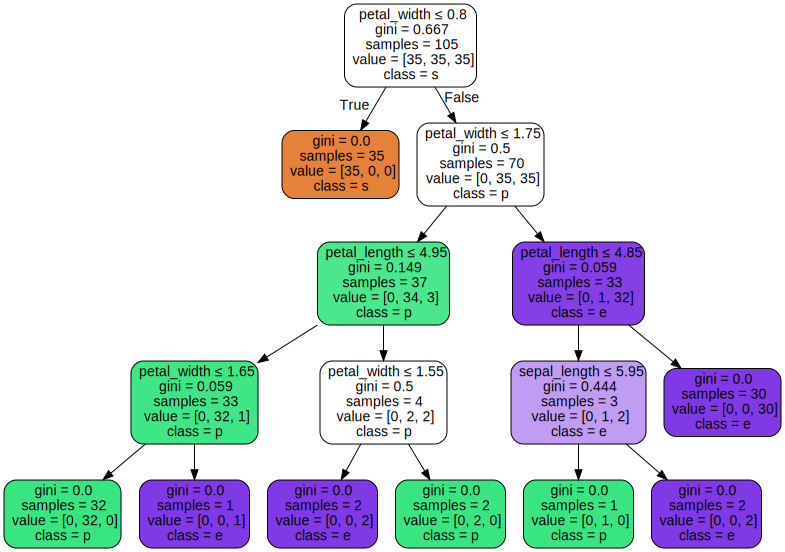

In [15]:
feature_names = X.columns.to_list() # lista contendo o nome dos atributos 

dot_data = export_graphviz(model, out_file=None, 
                           feature_names=feature_names, 
                           class_names='species', 
                           filled=True, rounded=True, 
                           special_characters=True) 

graphviz.Source(dot_data)